<a href="https://colab.research.google.com/github/amalvatsa/MyAI-Journey/blob/main/Ai3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MACHINE LEARNING-SUPERVISED LEARNING -REGRESSION-LINEAR REGRESSION

In [ ]:
#DATASET - https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv

In [ ]:
    #Univariate/single - 1 colum input and i colum output
    #multivariate/multiple - Multiple input and i colum output

In [ ]:
#TAKE THE DATA AND CREATE DATAFRAME
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv')
df

,Area,Prices
0,1000,550000
1,1500,800000
2,1800,1050000
3,2400,1240000
4,3000,1400000
5,3500,1650000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Prices'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Prices'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Area', 'Prices']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Area', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Prices', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Prices'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Area'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Prices'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Area', 'Prices']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Area', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Prices', 'count()', None], **{})
chart

In [ ]:
#-create a model which could pridict the propert prices based on the data

In [ ]:
#pre processing -optional so not performing

In [ ]:
#data visualisation -creation of graphs and representation

Text(0, 0.5, 'Prices')

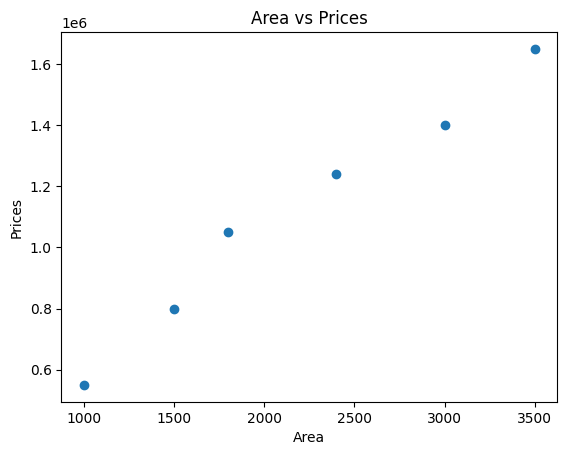

In [ ]:
import matplotlib.pyplot as plt
#scatter
plt.scatter(df['Area'],df['Prices'])
plt.title("Area vs Prices")
plt.xlabel("Area")
plt.ylabel("Prices")


In [ ]:
#area-input
#prices-output

In [ ]:
#4 Devide the data into input(x) and output(y)
#input (x)- is always 2 dimensional
#input (y)- is always 1 dimensional
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv')
df
x=  df.iloc[0:6,0:1]
x
#in the coloum slicing part,if there is a ':' then array is 2 dimensional
x=  df.iloc[0:6,0:1].values
#values convort into array
x


array([[1000],
       [1500],
       [1800],
       [2400],
       [3000],
       [3500]])

In [ ]:
y =df.iloc[:,1].values
y

array([ 550000,  800000, 1050000, 1240000, 1400000, 1650000])

In [ ]:
#TRAIN AND TEST VARIABLES
#IT IS NOT REQUIRED, BECAUSE WE HAVE LIMITED DATA


In [ ]:
#Normalization or scaling
#it onlt performed for mul dataset

In [ ]:
#7
#run a classifier/regressor or clusterer
#sklearn.linear_model --- pacake(collection of lib.) linearregresion-lib
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#8
# fit the model (map input with output)
#
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv')
df
x=  df.iloc[0:6,0:1]
x
#in the coloum slicing part,if there is a ':' then array is 2 dimensional
x=  df.iloc[0:6,0:1].values
#values convort into array
x
y =df.iloc[:,1].values
y

model.fit(x,y)

LinearRegression()

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv')
df
x=  df.iloc[0:6,0:1]
x
#in the coloum slicing part,if there is a ':' then array is 2 dimensional
x=  df.iloc[0:6,0:1].values
#values convort into array
x
y =df.iloc[:,1].values
y
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
#9
#predict the output
y_pred = model.predict(x) # using input values , we predict the output
y_pred

array([ 611053.81165919,  821031.39013453,  947017.93721973,
       1198991.03139013, 1450964.12556054, 1660941.70403587])

In [ ]:
y #actual output

array([ 550000,  800000, 1050000, 1240000, 1400000, 1650000])

In [ ]:
#conclustion
#we have to compare y_pred and y
#so when we compare y_pred and y, we come to know that there is a huge difference in the corresponding values
#this huge difference does not mean our model has predicted wrong
#it only means our model is NOT LINEAR/LESS LINEAR

In [ ]:
#INDIVIDUAL PREDICTION
#NOW I WANT TO PREDICT THE PROPERTY PRICE 2000 sqft
model.predict([[2000]])


array([1031008.96860987])

In [ ]:
#now let us cross verify the result of  individual prediction
#y=mx+c ---eqn. of a straight line
#m  =slope; c = y intercept
#y dependent varaible
#x independent var.

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv')
df
x=  df.iloc[0:6,0:1]
x
#in the coloum slicing part,if there is a ':' then array is 2 dimensional
x=  df.iloc[0:6,0:1].values
#values convort into array
x
y =df.iloc[:,1].values
y
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
#9
#predict the output
y_pred = model.predict(x) # using input values , we predict the output
y_pred
#using python tofind out m and C
m = model.coef_
m

array([419.95515695])

In [ ]:
C = model.intercept_
C

191098.65470852004

In [ ]:
#m and c in y=mx+c
m =2000+C
m

193098.65470852004

Text(0, 0.5, 'Prices')

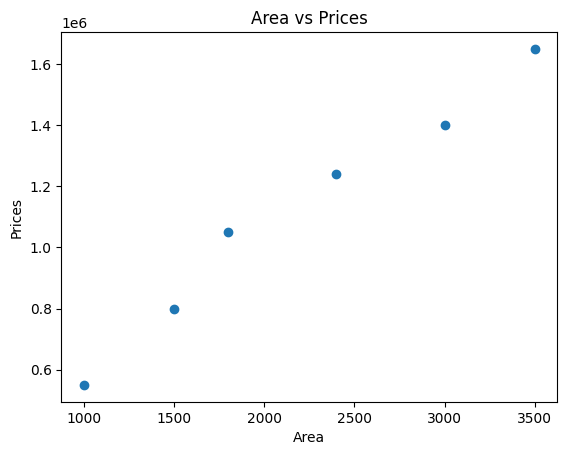

In [ ]:
import matplotlib.pyplot as plt
#scatter
plt.scatter(df['Area'],df['Prices'])
plt.title("Area vs Prices")
plt.xlabel("Area")
plt.ylabel("Prices")
#Final visulaition

Text(0.5, 1.0, 'best fit line ')

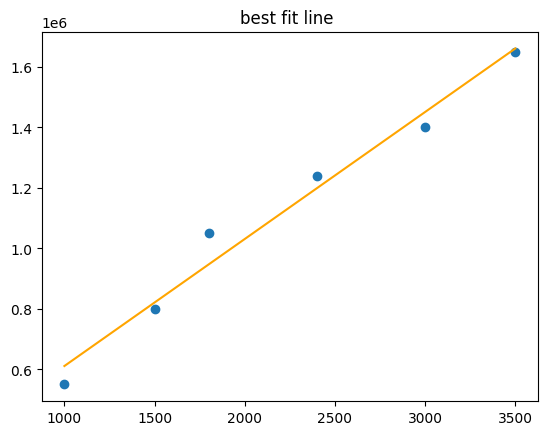

In [ ]:
plt.scatter(x,y)#actual values
plt.plot(x,y_pred,c="orange")# predicted values
plt.title('best fit line ')
plt.xlabel("Area")


In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/areavsprices.csv')
df
x=  df.iloc[0:6,0:1]
x
#in the coloum slicing part,if there is a ':' then array is 2 dimensional
x=  df.iloc[0:6,0:1].values
#values convort into array
x
y =df.iloc[:,1].values
y
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
#9
#predict the output
y_pred = model.predict(x) # using input values , we predict the output
y_pred
#using python tofind out m and C
m = model.coef_
m
C = model.intercept_
C
m =2000+C
m
#scatter
plt.scatter(df['Area'],df['Prices'])
plt.title("Area vs Prices")
plt.xlabel("Area")
plt.ylabel("Prices")
plt.scatter(x,y)#actual values
plt.plot(x,y_pred,c="orange")# predicted values
plt.title('best fit line ')
plt.xlabel("Area")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def create_model(dataset_path):

    try:

        dataset = pd.read_csv(dataset_path)


        X = dataset.iloc[:, :-1].values
        y = dataset.iloc[:, -1].values


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


        regressor = LinearRegression()
        regressor.fit(X_train, y_train)


        return regressor
    except Exception as e:

        print(f"Error: {e}")
        return None